# 线性回归

In [2]:
xArr,yArr=utils.loadDataSet('ex0.txt')
print ("xArr.shape = ", xArr.shape)
print ("yArr.shape = ", yArr.shape)

xArr.shape =  (200, 2)
yArr.shape =  (200,)


Expect Result:  

xArr.shape =  (200, 2)  
yArr.shape =  (200,)

In [3]:
# 直接用公式计算线性回归的闭式解
regression = StandRegre(xArr, yArr, xArr, yArr)
ws = regression.train()

print ("ws = ", ws)

ws =  [[3.00774324]
 [1.69532264]]


Expect Result:  

ws =  [[3.00774324]  
 [1.69532264]]

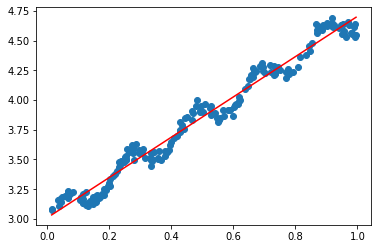

In [4]:
predict_y = regression.predict()
x = xArr[:,1]
y = yArr
utils.plotResult(x, y, predict_y)

In [5]:
np.corrcoef(predict_y, y)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

Expect Result:  

array([[1.        , 0.98647356],  
       [0.98647356, 1.        ]])

# 局部加权线性回归， locally weighted linear regression

In [6]:
xArr,yArr=utils.loadDataSet('ex0.txt')

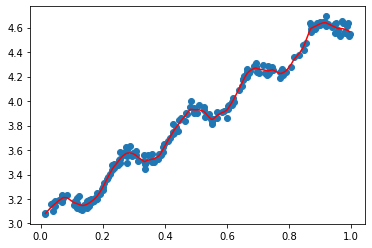

In [7]:
regression = Lwlr(xArr, yArr, xArr, yArr)
predict_y = regression.train_and_predict(0.01)
utils.plotResult(xArr[:,1], yArr, predict_y)

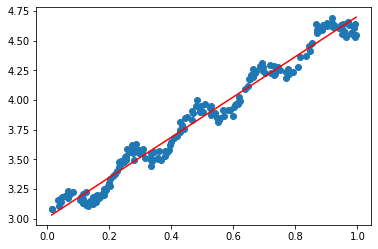

In [8]:
predict_y = regression.train_and_predict(1.0)
utils.plotResult(xArr[:,1], yArr, predict_y)

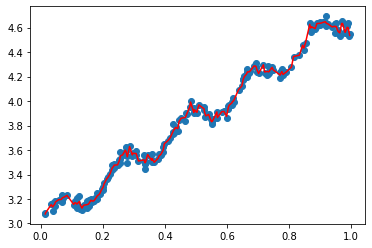

In [9]:
predict_y = regression.train_and_predict(0.003)
utils.plotResult(xArr[:,1], yArr, predict_y)

# Abalone Data

In [10]:
abX,abY=utils.loadDataSet('abalone.txt')
train_X, train_y, test_X, test_y = abX[0:99],abY[0:99],abX[100:199],abY[100:199]
reg1 = Lwlr(train_X, train_y, train_X, train_y)
reg2 = Lwlr(train_X, train_y, test_X, test_y)

def testLwlr(reg, k):
    predict_y = reg.train_and_predict(k)
    error = utils.rssError(predict_y, reg.test_y)
    print ("k = ", k, ", error = ", error)

In [11]:
reg1 = Lwlr(train_X, train_y, train_X, train_y)
testLwlr(reg1, 0.1)
testLwlr(reg1, 1)
testLwlr(reg1, 10)

k =  0.1 , error =  56.81549669032892
k =  1 , error =  429.8905618702056
k =  10 , error =  549.1181708826584


Expect Result:  

k =  0.1  error =  56.81549669032892  
k =  1  error =  429.8905618702056  
k =  10  error =  549.1181708826584

In [12]:
reg2 = Lwlr(train_X, train_y, test_X, test_y)
testLwlr(reg2, 0.1)
testLwlr(reg2, 1)
testLwlr(reg2, 10)

k =  0.1 , error =  40659.27596541478
k =  1 , error =  573.5261441898057
k =  10 , error =  517.5711905382693


Expect Result:  

k =  0.1 , error =  40659.27596541478  
k =  1 , error =  573.5261441898057  
k =  10 , error =  517.5711905382693

In [13]:
regression = StandRegre(train_X, train_y, test_X, test_y)
regression.train()
predict_y = regression.predict()
utils.rssError(predict_y, test_y)

518.6363153248217

Expect Result:  518.6363153248217

# Ridge Regression

(30, 8)


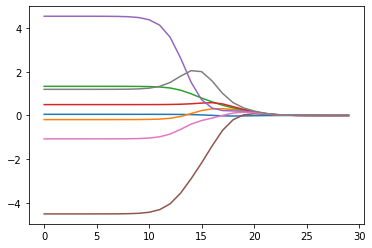

In [14]:
abX,abY= utils.loadDataSet('abalone.txt')
X = utils.standardization(np.array(abX))
regression = RidgeRegre(X, abY, None, None)
ws = np.zeros((0, X.shape[1]))
for i in range(-10, 20):
    w = regression.train(np.exp(i)).T
    ws = np.vstack([ws, w])

print (ws.shape)
plt.plot(ws)
plt.show()

# Stage Wise

In [15]:
xArr,yArr=utils.loadDataSet('abalone.txt')
X = utils.standardization(np.array(xArr))
regression = StageWise(X, yArr, None, None)
regression.train(0.01,200)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01])

Expect Result:  
array([ 0.  ,  0.  ,  0.  ,  0.32,  0.  , -0.08,  0.  ,  1.6 ])

In [16]:
# stageWise(xArr,yArr,0.001,5000)
regression.train(0.001,5000)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001])

Expect Result:  
array([ 0.   ,  0.   ,  0.645,  0.451,  0.   , -1.553,  0.   ,  2.351])

In [18]:
X = utils.standardization(np.array(xArr))
y = np.array(yArr)
regression = StandRegre(X, y, None, None)
regression.train()

array([[ 0.05235616],
       [-0.18938966],
       [ 1.33168957],
       [ 0.49619321],
       [ 4.53579572],
       [-4.50107876],
       [-1.06982725],
       [ 1.19429503]])

Expect Result:  

array([[ 0.05235616],  
       [-0.18938966],  
       [ 1.33168957],   
       [ 0.49619321],  
       [ 4.53579572],  
       [-4.50107876],  
       [-1.06982725],  
       [ 1.19429503]])

In [ ]:
# 这个函数要运行很久
# plotStageWise()

谷歌网站访问不了，后面的例子没有做